In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
from scipy import stats
import os, warnings
warnings.filterwarnings(action='ignore')

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv("data/train_df_jm.csv")
test = pd.read_csv("data/test_df_jm.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2869, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [5]:
train.head(30)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0


In [6]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

## Age 정보 추가

In [7]:
train.shape, test.shape

((2869, 15), (1008, 14))

In [8]:
train = pd.merge(train,age)
test = pd.merge(test,age)

In [9]:
train.shape, test.shape

((2869, 37), (1008, 36))

In [10]:
len(test['단지코드'].unique())

147

((array([-3.48993426, -3.24543014, -3.11017715, ...,  3.11017715,
          3.24543014,  3.48993426]),
  array([2.56494936, 2.56494936, 2.56494936, ..., 7.84384864, 7.84384864,
         7.84384864])),
 (0.8805142620262187, 5.974051234508852, 0.9839921058038086))

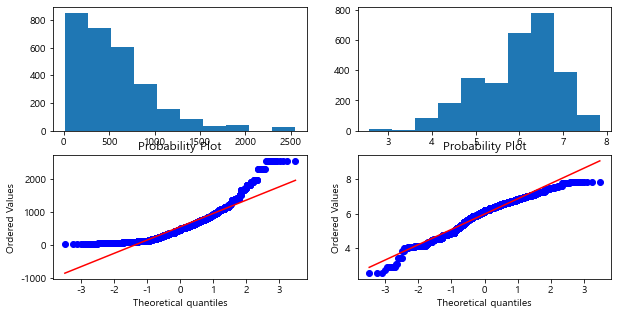

In [11]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(train['등록차량수'])
ax[0][1].hist(np.log(train['등록차량수']))

stats.probplot(train['등록차량수'], plot=ax[1][0])
stats.probplot(np.log(train['등록차량수']), plot=ax[1][1])

In [12]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df
all_df.shape

(3877, 36)

In [13]:
all_df.shape

(3877, 36)

## 결측치 처리

### 자격유형

In [14]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

In [15]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [16]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3256,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3257,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3258,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3260,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [17]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3455,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3456,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [18]:
all_df.loc[ 3259, "자격유형"] = 'A'
all_df.loc[ 3454, "자격유형"] = 'C'

In [19]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

### 임대보증금

In [20]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(18, 36)
변경후
(0, 36)


In [21]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0


### 임대료

In [22]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(21, 36)
변경후
(0, 36)


In [23]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0


In [24]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3877 non-null   object 
 1   총세대수        3877 non-null   int64  
 2   임대건물구분      3877 non-null   object 
 3   지역          3877 non-null   object 
 4   공급유형        3877 non-null   object 
 5   전용면적        3877 non-null   float64
 6   전용면적별세대수    3877 non-null   int64  
 7   공가수         3877 non-null   float64
 8   자격유형        3877 non-null   object 
 9   임대보증금       3877 non-null   int32  
 10  임대료         3877 non-null   int32  
 11  10분내지하철수    3632 non-null   float64
 12  10분내버스정류장수  3877 non-null   float64
 13  단지내주차면수     3877 non-null   float64
 14  10대미만(여자)   3877 non-null   float64
 15  10대미만(남자)   3877 non-null   float64
 16  10대(여자)     3877 non-null   float64
 17  10대(남자)     3877 non-null   float64
 18  20대(여자)     3877 non-null   float64
 19  20대(남자)     3877 non-null  

### 10분내 지하철 수

In [26]:
#일단 Nan 0으로 처리
print(all_df['10분내지하철수'].isnull().sum())
all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
print('변경후')
print(all_df['10분내지하철수'].isnull().sum())

245
변경후
0


In [27]:
# sub_tn = pd.read_csv("data/train(subway).csv")
# sub_tt = pd.read_csv("data/test(subway).csv")

In [28]:
# all_sub_df = pd.concat([sub_tn['지하철수'], sub_tt['지하철수']], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
# all_sub_df.shape

In [29]:
# all_df['10분내지하철수'] = all_sub_df

In [30]:
# all_df.head()

In [31]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [32]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.057391
10분내버스정류장수    1.000000
단지내주차면수       0.102414
10대미만(여자)     0.149232
10대미만(남자)     0.146037
10대(여자)       0.028896
10대(남자)       0.023680
20대(여자)      -0.029804
20대(남자)      -0.056424
30대(여자)       0.128756
30대(남자)       0.116142
40대(여자)       0.120484
40대(남자)       0.141870
50대(여자)      -0.063712
50대(남자)      -0.137947
60대(여자)      -0.092533
60대(남자)      -0.127703
70대(여자)      -0.091376
70대(남자)      -0.055173
80대(여자)      -0.121266
80대(남자)      -0.047644
90대(여자)      -0.073738
90대(남자)      -0.007165
100대(여자)      0.074504
100대(남자)      0.018021
Name: 10분내버스정류장수, dtype: float64

In [33]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
359,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
360,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
361,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [34]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

4.011278195488722

In [35]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [36]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)


In [37]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [38]:
all_df.shape

(3877, 36)

# 라벨인코딩

In [39]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [40]:
all_df.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1790,657,상가,경상남도,임대상가,248.56,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
96,C2109,495,아파트,경상남도,영구임대,26.34,288,2.0,3,3138000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
97,C2109,495,아파트,경상남도,영구임대,30.48,192,2.0,3,3631000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
98,C2109,495,상가,경상남도,임대상가,31.84,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [41]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,아파트,세종특별자치시,행복주택,38.20,68,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3873,C1229,453,아파트,세종특별자치시,행복주택,38.20,8,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3874,C1229,453,아파트,세종특별자치시,행복주택,38.25,3,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3875,C1229,453,아파트,세종특별자치시,행복주택,38.28,4,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9


In [42]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 0, 3, 2, 4], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [43]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [44]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [45]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [46]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 변수 추가

In [47]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872    30221500
3873    30221500
3874    30221500
3875    30221500
3876    34119030
Name: 환산보증금, Length: 3877, dtype: int32

In [48]:
all_df['주차면수대비총세대수비율'] = all_df['총세대수']/all_df['단지내주차면수']
all_df['거주율'] =1 - (all_df['공가수']/all_df['총세대수'])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.49498623, 7.49498623,
         7.49498623])),
 (0.7344105105721078, 6.126121425642588, 0.9868157045962277))

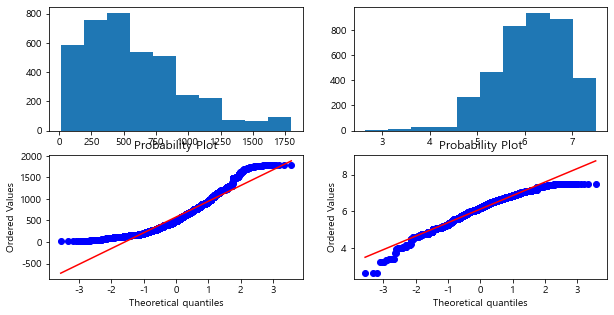

In [49]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['단지내주차면수'])
ax[0][1].hist(all_df['log_단지내주차면수'])

stats.probplot(all_df['단지내주차면수'], plot=ax[1][0])
stats.probplot(all_df['log_단지내주차면수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([3.29583687, 3.29583687, 3.29583687, ..., 7.85282781, 7.85282781,
         7.85282781])),
 (0.6093767949475518, 6.611311889490474, 0.9883341683848889))

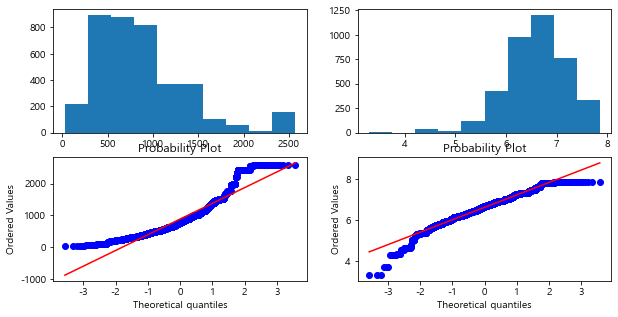

In [50]:
all_df['log_총세대수'] = np.log1p(all_df['총세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['log_총세대수'])

stats.probplot(all_df['총세대수'], plot=ax[1][0])
stats.probplot(all_df['log_총세대수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([0.6931472, 0.6931472, 0.6931472, ..., 7.293698 , 7.3072023,
         7.5315523], dtype=float32)),
 (1.6307518283269595, 3.662091016769409, 0.9441208816516677))

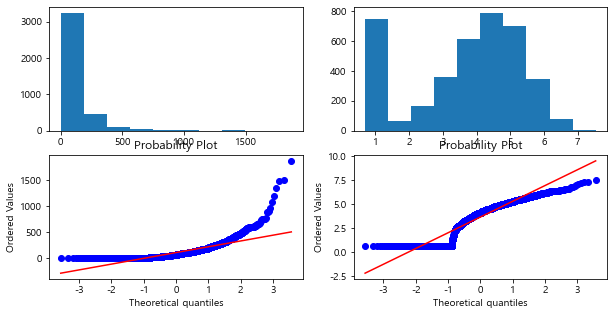

In [51]:
all_df['log_전용면적별세대수'] = np.log1p(all_df['전용면적별세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['전용면적별세대수'])
ax[0][1].hist(all_df['log_전용면적별세대수'])

stats.probplot(all_df['전용면적별세대수'], plot=ax[1][0])
stats.probplot(all_df['log_전용면적별세대수'], plot=ax[1][1])

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <BarContainer object of 10 artists>)

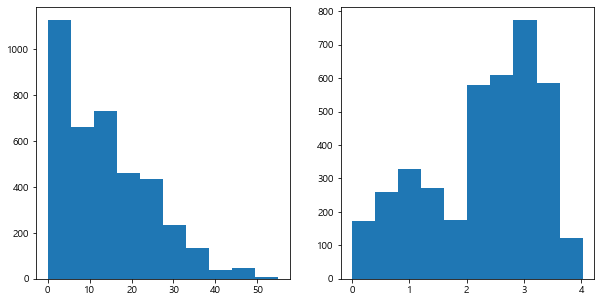

In [52]:
all_df['log_공가수'] = np.log1p(all_df['공가수'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(all_df['공가수'])
ax[1].hist(all_df['log_공가수'])

In [53]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,38.20,68.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,4.234107,3.178054
3873,C1229,453,38.20,8.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,2.197225,3.178054
3874,C1229,453,38.25,3.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.386294,3.178054
3875,C1229,453,38.28,4.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.609438,3.178054


In [54]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          3877 non-null   category
 1   총세대수          3877 non-null   int64   
 2   임대건물구분        3877 non-null   object  
 3   지역            3877 non-null   object  
 4   공급유형          3877 non-null   object  
 5   전용면적          3877 non-null   float64 
 6   전용면적별세대수      3877 non-null   float32 
 7   공가수           3877 non-null   float64 
 8   자격유형          3877 non-null   int32   
 9   임대보증금         3877 non-null   int32   
 10  임대료           3877 non-null   int32   
 11  10분내지하철수      3877 non-null   float64 
 12  10분내버스정류장수    3877 non-null   float64 
 13  단지내주차면수       3877 non-null   float64 
 14  10대미만(여자)     3877 non-null   float64 
 15  10대미만(남자)     3877 non-null   float64 
 16  10대(여자)       3877 non-null   float64 
 17  10대(남자)       3877 non-null   float64 
 18  20대(여자) 

In [55]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [56]:
train.corr()['등록차량수']

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
10대미만(여자)     0.268142
10대미만(남자)     0.274423
10대(여자)       0.017406
10대(남자)      -0.013654
20대(여자)       0.008058
20대(남자)      -0.138710
30대(여자)       0.384424
30대(남자)       0.369807
40대(여자)       0.186006
40대(남자)       0.320559
50대(여자)      -0.236608
50대(남자)      -0.266656
60대(여자)      -0.191946
60대(남자)      -0.243727
70대(여자)      -0.190950
70대(남자)      -0.147894
80대(여자)      -0.224072
80대(남자)      -0.151342
90대(여자)      -0.180396
90대(남자)      -0.054103
100대(여자)      0.134927
100대(남자)      0.006264
Name: 등록차량수, dtype: float64

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

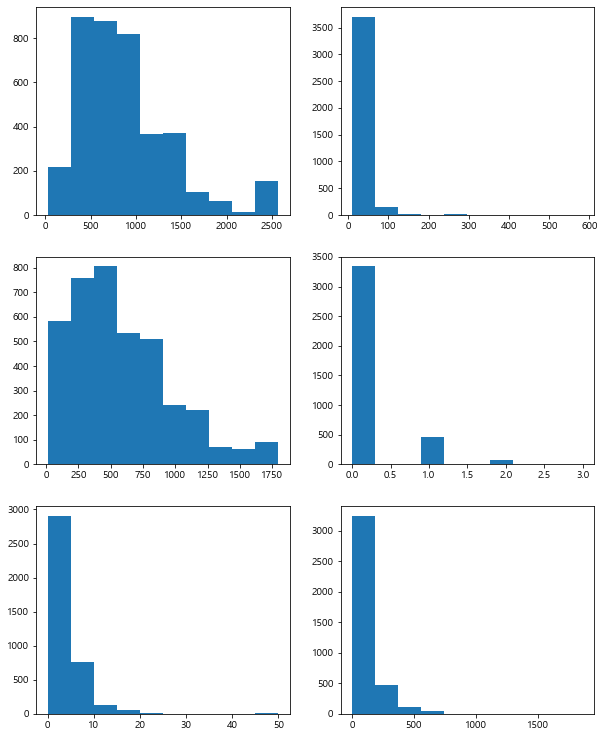

In [57]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

# 원핫 인코딩

In [58]:
# print("dummy 수행 전 shape",all_df_last.shape)
# all_df_last_oh = pd.get_dummies(all_df_last)
# print("dummy 수행 후 shape",all_df_last_oh.shape)

In [59]:
train_df = all_df_last.iloc[0:2869,:]
test_df = all_df_last.iloc[2869:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2086,1080,59.94,30.0,7.0,1,39000000,460000,0.0,2.0,...,3,3.0,39460100,0.945709,0.993519,7.041412,6.985642,3.433987,2.079442,1524.0
2865,C2086,1080,74.92,156.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,5.056246,2.079442,1524.0
2866,C2086,1080,74.93,78.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,4.369448,2.079442,1524.0
2867,C2086,1080,84.88,160.0,7.0,1,61000000,600000,0.0,2.0,...,3,3.0,61600100,0.945709,0.993519,7.041412,6.985642,5.081404,2.079442,1524.0


In [60]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [61]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.326923
전용면적            0.106366
전용면적별세대수        0.254948
공가수             0.130775
자격유형           -0.145695
임대보증금           0.412956
임대료             0.530381
10분내지하철수       -0.079587
10분내버스정류장수      0.110977
단지내주차면수         0.856549
10대미만(여자)       0.268142
10대미만(남자)       0.274423
10대(여자)         0.017406
10대(남자)        -0.013654
20대(여자)         0.008058
20대(남자)        -0.138710
30대(여자)         0.384424
30대(남자)         0.369807
40대(여자)         0.186006
40대(남자)         0.320559
50대(여자)        -0.236608
50대(남자)        -0.266656
60대(여자)        -0.191946
60대(남자)        -0.243727
70대(여자)        -0.190950
70대(남자)        -0.147894
80대(여자)        -0.224072
80대(남자)        -0.151342
90대(여자)        -0.180396
90대(남자)        -0.054103
100대(여자)        0.134927
100대(남자)        0.006264
임대건물구분_lbl     -0.449235
지역_lbl          0.044321
공급유형_lbl       -0.158484
단지코드_lbl       -0.097279
qcut_총세대수       0.391915
단지코드_Type       0.106931
환산보증금           0.414723
주차면수대비총세대수비

In [62]:
pd.set_option('display.min_rows',10)

In [63]:
train_df.head(30)

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C2576,405,46.90,313.0,19.0,1,19436000,161780,0.0,4.0,...,3.0,19597880,1.368243,0.953086,5.693732,6.006353,5.749393,2.995732,73.0,4.304065
8,C2576,405,59.88,92.0,19.0,1,28252000,235420,0.0,4.0,...,3.0,28487520,1.368243,0.953086,5.693732,6.006353,4.532599,2.995732,73.0,4.304065
9,C2416,560,26.34,360.0,0.0,3,3138000,69820,0.0,5.0,...,3.0,3207920,3.636364,1.000000,5.043425,6.329721,5.888878,0.000000,63.0,4.158883


In [64]:
train_df.shape

(2869, 48)

In [65]:
train_df.isnull().sum()

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
주차면수대비총세대수비율    0
거주율             0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

In [66]:
train_df.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', '주차면수대비총세대수비율', '거주율', 'log_단지내주차면수',
       'log_총세대수', 'log_전용면적별세대수', 'log_공가수', '등록차량수', 'log_등록차량수'],
      dtype='object')

# 서울은 test에 없으니깐 제외하고 보자!

In [67]:
train = train.loc[~(train['지역'] =='서울특별시'),:]

In [68]:
# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
#        'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
#        '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
#        '단지코드_Type']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#        '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
#        '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
#        '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
#        '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
# lable_name = 'log_등록차량수'
sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# 회귀 트리 모델 학습/예측/평가

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [70]:
# # 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
# def get_top_features(model):
#     ftr_importances_values = model.feature_importances_
#     ftr_importances = pd.Series(ftr_importances_values, index=X.columns  )
#     ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
#     return ftr_top20

# def visualize_ftr_importances(models):
#     # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
#     fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
#     fig.tight_layout() 
#     # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
#     for i_num, model in enumerate(models):
#         # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
#         ftr_top20 = get_top_features(model)
#         axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
#         #font 크기 조정.
#         for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
#             label.set_fontsize(22)
#         sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# # 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
# models = [best_xgb, best_lgbm, best_catm, best_catm]
# visualize_ftr_importances(models)

In [71]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error
def get_mae_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mae = mean_absolute_error(y_test , pred_value)
        print('{0} 모델의 MAE: {1}'.format(key, mae))

xgb_reg = XGBRegressor(n_estimators=5000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=5000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
catm_reg = CatBoostRegressor(n_estimators=5000, learning_rate=0.05 ,random_state= 0,verbose= 1,objective = "MAE")

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
catm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
catm_pred = catm_reg.predict(X_test)


pred = 0.3 * xgb_pred + 0.3 * lgbm_pred + 0.4 * catm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred,
          'CATM' : catm_pred}
  
get_mae_pred(preds)

0:	learn: 0.6818559	total: 151ms	remaining: 12m 33s
1:	learn: 0.6551152	total: 163ms	remaining: 6m 48s
2:	learn: 0.6286030	total: 176ms	remaining: 4m 52s
3:	learn: 0.6026781	total: 189ms	remaining: 3m 55s
4:	learn: 0.5805507	total: 202ms	remaining: 3m 21s
5:	learn: 0.5597184	total: 214ms	remaining: 2m 58s
6:	learn: 0.5385698	total: 228ms	remaining: 2m 42s
7:	learn: 0.5193003	total: 240ms	remaining: 2m 29s
8:	learn: 0.5028797	total: 254ms	remaining: 2m 20s
9:	learn: 0.4876192	total: 267ms	remaining: 2m 13s
10:	learn: 0.4708417	total: 280ms	remaining: 2m 7s
11:	learn: 0.4559035	total: 293ms	remaining: 2m 1s
12:	learn: 0.4410363	total: 307ms	remaining: 1m 57s
13:	learn: 0.4275103	total: 321ms	remaining: 1m 54s
14:	learn: 0.4153771	total: 337ms	remaining: 1m 51s
15:	learn: 0.4029168	total: 352ms	remaining: 1m 49s
16:	learn: 0.3910823	total: 367ms	remaining: 1m 47s
17:	learn: 0.3797004	total: 379ms	remaining: 1m 44s
18:	learn: 0.3675408	total: 393ms	remaining: 1m 42s
19:	learn: 0.3573707	to

165:	learn: 0.1218702	total: 2.54s	remaining: 1m 13s
166:	learn: 0.1215484	total: 2.55s	remaining: 1m 13s
167:	learn: 0.1210751	total: 2.56s	remaining: 1m 13s
168:	learn: 0.1206989	total: 2.58s	remaining: 1m 13s
169:	learn: 0.1204778	total: 2.59s	remaining: 1m 13s
170:	learn: 0.1203241	total: 2.6s	remaining: 1m 13s
171:	learn: 0.1200372	total: 2.61s	remaining: 1m 13s
172:	learn: 0.1199257	total: 2.63s	remaining: 1m 13s
173:	learn: 0.1197629	total: 2.64s	remaining: 1m 13s
174:	learn: 0.1195019	total: 2.65s	remaining: 1m 13s
175:	learn: 0.1189902	total: 2.66s	remaining: 1m 13s
176:	learn: 0.1187145	total: 2.68s	remaining: 1m 12s
177:	learn: 0.1185168	total: 2.69s	remaining: 1m 12s
178:	learn: 0.1184889	total: 2.7s	remaining: 1m 12s
179:	learn: 0.1182398	total: 2.71s	remaining: 1m 12s
180:	learn: 0.1179653	total: 2.73s	remaining: 1m 12s
181:	learn: 0.1178016	total: 2.74s	remaining: 1m 12s
182:	learn: 0.1175418	total: 2.75s	remaining: 1m 12s
183:	learn: 0.1172835	total: 2.77s	remaining: 1m

331:	learn: 0.0955671	total: 4.73s	remaining: 1m 6s
332:	learn: 0.0954327	total: 4.74s	remaining: 1m 6s
333:	learn: 0.0954166	total: 4.75s	remaining: 1m 6s
334:	learn: 0.0953864	total: 4.77s	remaining: 1m 6s
335:	learn: 0.0953047	total: 4.78s	remaining: 1m 6s
336:	learn: 0.0951957	total: 4.79s	remaining: 1m 6s
337:	learn: 0.0951105	total: 4.8s	remaining: 1m 6s
338:	learn: 0.0947843	total: 4.82s	remaining: 1m 6s
339:	learn: 0.0945175	total: 4.83s	remaining: 1m 6s
340:	learn: 0.0943894	total: 4.84s	remaining: 1m 6s
341:	learn: 0.0943712	total: 4.86s	remaining: 1m 6s
342:	learn: 0.0943402	total: 4.87s	remaining: 1m 6s
343:	learn: 0.0942999	total: 4.88s	remaining: 1m 6s
344:	learn: 0.0941822	total: 4.89s	remaining: 1m 6s
345:	learn: 0.0941038	total: 4.91s	remaining: 1m 6s
346:	learn: 0.0940285	total: 4.92s	remaining: 1m 5s
347:	learn: 0.0939381	total: 4.93s	remaining: 1m 5s
348:	learn: 0.0937222	total: 4.95s	remaining: 1m 5s
349:	learn: 0.0937097	total: 4.96s	remaining: 1m 5s
350:	learn: 0

493:	learn: 0.0792704	total: 6.76s	remaining: 1m 1s
494:	learn: 0.0792403	total: 6.78s	remaining: 1m 1s
495:	learn: 0.0792299	total: 6.79s	remaining: 1m 1s
496:	learn: 0.0791276	total: 6.8s	remaining: 1m 1s
497:	learn: 0.0789233	total: 6.81s	remaining: 1m 1s
498:	learn: 0.0787737	total: 6.83s	remaining: 1m 1s
499:	learn: 0.0786979	total: 6.84s	remaining: 1m 1s
500:	learn: 0.0786794	total: 6.85s	remaining: 1m 1s
501:	learn: 0.0783994	total: 6.86s	remaining: 1m 1s
502:	learn: 0.0783757	total: 6.88s	remaining: 1m 1s
503:	learn: 0.0783574	total: 6.89s	remaining: 1m 1s
504:	learn: 0.0783451	total: 6.9s	remaining: 1m 1s
505:	learn: 0.0783185	total: 6.91s	remaining: 1m 1s
506:	learn: 0.0782968	total: 6.92s	remaining: 1m 1s
507:	learn: 0.0782884	total: 6.94s	remaining: 1m 1s
508:	learn: 0.0782614	total: 6.95s	remaining: 1m 1s
509:	learn: 0.0782495	total: 6.96s	remaining: 1m 1s
510:	learn: 0.0782372	total: 6.98s	remaining: 1m 1s
511:	learn: 0.0781523	total: 6.99s	remaining: 1m 1s
512:	learn: 0.

660:	learn: 0.0697297	total: 8.96s	remaining: 58.8s
661:	learn: 0.0697251	total: 8.97s	remaining: 58.8s
662:	learn: 0.0696786	total: 8.99s	remaining: 58.8s
663:	learn: 0.0696479	total: 9s	remaining: 58.8s
664:	learn: 0.0695449	total: 9.01s	remaining: 58.8s
665:	learn: 0.0695164	total: 9.03s	remaining: 58.8s
666:	learn: 0.0694928	total: 9.04s	remaining: 58.7s
667:	learn: 0.0694144	total: 9.06s	remaining: 58.7s
668:	learn: 0.0693204	total: 9.07s	remaining: 58.7s
669:	learn: 0.0693120	total: 9.08s	remaining: 58.7s
670:	learn: 0.0693028	total: 9.1s	remaining: 58.7s
671:	learn: 0.0693007	total: 9.11s	remaining: 58.7s
672:	learn: 0.0692671	total: 9.12s	remaining: 58.6s
673:	learn: 0.0692630	total: 9.13s	remaining: 58.6s
674:	learn: 0.0692151	total: 9.15s	remaining: 58.6s
675:	learn: 0.0690510	total: 9.16s	remaining: 58.6s
676:	learn: 0.0690478	total: 9.18s	remaining: 58.6s
677:	learn: 0.0689493	total: 9.19s	remaining: 58.6s
678:	learn: 0.0687477	total: 9.21s	remaining: 58.6s
679:	learn: 0.06

819:	learn: 0.0609815	total: 11.2s	remaining: 56.9s
820:	learn: 0.0609426	total: 11.2s	remaining: 56.9s
821:	learn: 0.0609292	total: 11.2s	remaining: 56.9s
822:	learn: 0.0609069	total: 11.2s	remaining: 56.9s
823:	learn: 0.0608606	total: 11.2s	remaining: 56.9s
824:	learn: 0.0607335	total: 11.2s	remaining: 56.9s
825:	learn: 0.0606926	total: 11.3s	remaining: 56.9s
826:	learn: 0.0606537	total: 11.3s	remaining: 56.9s
827:	learn: 0.0606277	total: 11.3s	remaining: 56.8s
828:	learn: 0.0606163	total: 11.3s	remaining: 56.8s
829:	learn: 0.0606125	total: 11.3s	remaining: 56.8s
830:	learn: 0.0605900	total: 11.3s	remaining: 56.8s
831:	learn: 0.0605313	total: 11.3s	remaining: 56.8s
832:	learn: 0.0604827	total: 11.4s	remaining: 56.8s
833:	learn: 0.0604731	total: 11.4s	remaining: 56.8s
834:	learn: 0.0602318	total: 11.4s	remaining: 56.8s
835:	learn: 0.0601878	total: 11.4s	remaining: 56.8s
836:	learn: 0.0601782	total: 11.4s	remaining: 56.8s
837:	learn: 0.0600972	total: 11.4s	remaining: 56.8s
838:	learn: 

981:	learn: 0.0553593	total: 13.4s	remaining: 54.9s
982:	learn: 0.0553088	total: 13.4s	remaining: 54.9s
983:	learn: 0.0552699	total: 13.5s	remaining: 54.9s
984:	learn: 0.0552380	total: 13.5s	remaining: 54.9s
985:	learn: 0.0552318	total: 13.5s	remaining: 54.9s
986:	learn: 0.0551903	total: 13.5s	remaining: 54.9s
987:	learn: 0.0551811	total: 13.5s	remaining: 54.9s
988:	learn: 0.0551499	total: 13.5s	remaining: 54.8s
989:	learn: 0.0551198	total: 13.5s	remaining: 54.8s
990:	learn: 0.0550982	total: 13.5s	remaining: 54.8s
991:	learn: 0.0550520	total: 13.6s	remaining: 54.8s
992:	learn: 0.0550476	total: 13.6s	remaining: 54.8s
993:	learn: 0.0550377	total: 13.6s	remaining: 54.8s
994:	learn: 0.0550343	total: 13.6s	remaining: 54.7s
995:	learn: 0.0550172	total: 13.6s	remaining: 54.7s
996:	learn: 0.0550112	total: 13.6s	remaining: 54.7s
997:	learn: 0.0549726	total: 13.6s	remaining: 54.7s
998:	learn: 0.0549595	total: 13.7s	remaining: 54.7s
999:	learn: 0.0549384	total: 13.7s	remaining: 54.7s
1000:	learn:

1144:	learn: 0.0509323	total: 15.6s	remaining: 52.6s
1145:	learn: 0.0509258	total: 15.6s	remaining: 52.6s
1146:	learn: 0.0509200	total: 15.6s	remaining: 52.5s
1147:	learn: 0.0509068	total: 15.7s	remaining: 52.5s
1148:	learn: 0.0508785	total: 15.7s	remaining: 52.5s
1149:	learn: 0.0508137	total: 15.7s	remaining: 52.5s
1150:	learn: 0.0508024	total: 15.7s	remaining: 52.5s
1151:	learn: 0.0507993	total: 15.7s	remaining: 52.5s
1152:	learn: 0.0507298	total: 15.7s	remaining: 52.4s
1153:	learn: 0.0507160	total: 15.7s	remaining: 52.4s
1154:	learn: 0.0507089	total: 15.7s	remaining: 52.4s
1155:	learn: 0.0506987	total: 15.8s	remaining: 52.4s
1156:	learn: 0.0506937	total: 15.8s	remaining: 52.4s
1157:	learn: 0.0506679	total: 15.8s	remaining: 52.4s
1158:	learn: 0.0506538	total: 15.8s	remaining: 52.4s
1159:	learn: 0.0506313	total: 15.8s	remaining: 52.3s
1160:	learn: 0.0505951	total: 15.8s	remaining: 52.3s
1161:	learn: 0.0505582	total: 15.8s	remaining: 52.3s
1162:	learn: 0.0504266	total: 15.8s	remaining:

1313:	learn: 0.0473002	total: 17.8s	remaining: 50s
1314:	learn: 0.0472238	total: 17.8s	remaining: 50s
1315:	learn: 0.0471789	total: 17.8s	remaining: 49.9s
1316:	learn: 0.0471345	total: 17.9s	remaining: 49.9s
1317:	learn: 0.0471087	total: 17.9s	remaining: 49.9s
1318:	learn: 0.0470693	total: 17.9s	remaining: 49.9s
1319:	learn: 0.0470631	total: 17.9s	remaining: 49.9s
1320:	learn: 0.0470200	total: 17.9s	remaining: 49.9s
1321:	learn: 0.0469231	total: 17.9s	remaining: 49.8s
1322:	learn: 0.0469109	total: 17.9s	remaining: 49.8s
1323:	learn: 0.0468911	total: 17.9s	remaining: 49.8s
1324:	learn: 0.0468898	total: 18s	remaining: 49.8s
1325:	learn: 0.0468839	total: 18s	remaining: 49.8s
1326:	learn: 0.0468574	total: 18s	remaining: 49.8s
1327:	learn: 0.0468059	total: 18s	remaining: 49.8s
1328:	learn: 0.0468040	total: 18s	remaining: 49.7s
1329:	learn: 0.0467751	total: 18s	remaining: 49.7s
1330:	learn: 0.0467491	total: 18s	remaining: 49.7s
1331:	learn: 0.0466839	total: 18s	remaining: 49.7s
1332:	learn: 

1469:	learn: 0.0442616	total: 19.8s	remaining: 47.6s
1470:	learn: 0.0442579	total: 19.8s	remaining: 47.6s
1471:	learn: 0.0442336	total: 19.8s	remaining: 47.5s
1472:	learn: 0.0442317	total: 19.8s	remaining: 47.5s
1473:	learn: 0.0442263	total: 19.9s	remaining: 47.5s
1474:	learn: 0.0442035	total: 19.9s	remaining: 47.5s
1475:	learn: 0.0441932	total: 19.9s	remaining: 47.5s
1476:	learn: 0.0441650	total: 19.9s	remaining: 47.5s
1477:	learn: 0.0441632	total: 19.9s	remaining: 47.4s
1478:	learn: 0.0441491	total: 19.9s	remaining: 47.4s
1479:	learn: 0.0441473	total: 19.9s	remaining: 47.4s
1480:	learn: 0.0441456	total: 19.9s	remaining: 47.4s
1481:	learn: 0.0441432	total: 20s	remaining: 47.4s
1482:	learn: 0.0441416	total: 20s	remaining: 47.4s
1483:	learn: 0.0441412	total: 20s	remaining: 47.3s
1484:	learn: 0.0441399	total: 20s	remaining: 47.3s
1485:	learn: 0.0441379	total: 20s	remaining: 47.3s
1486:	learn: 0.0441341	total: 20s	remaining: 47.3s
1487:	learn: 0.0441320	total: 20s	remaining: 47.3s
1488:	l

1626:	learn: 0.0423711	total: 21.8s	remaining: 45.2s
1627:	learn: 0.0423618	total: 21.8s	remaining: 45.2s
1628:	learn: 0.0423544	total: 21.8s	remaining: 45.2s
1629:	learn: 0.0423062	total: 21.9s	remaining: 45.2s
1630:	learn: 0.0423026	total: 21.9s	remaining: 45.2s
1631:	learn: 0.0422900	total: 21.9s	remaining: 45.2s
1632:	learn: 0.0422745	total: 21.9s	remaining: 45.1s
1633:	learn: 0.0422581	total: 21.9s	remaining: 45.1s
1634:	learn: 0.0422549	total: 21.9s	remaining: 45.1s
1635:	learn: 0.0422527	total: 21.9s	remaining: 45.1s
1636:	learn: 0.0422200	total: 21.9s	remaining: 45.1s
1637:	learn: 0.0422105	total: 22s	remaining: 45.1s
1638:	learn: 0.0421803	total: 22s	remaining: 45.1s
1639:	learn: 0.0421721	total: 22s	remaining: 45s
1640:	learn: 0.0421587	total: 22s	remaining: 45s
1641:	learn: 0.0421174	total: 22s	remaining: 45s
1642:	learn: 0.0421146	total: 22s	remaining: 45s
1643:	learn: 0.0420924	total: 22s	remaining: 45s
1644:	learn: 0.0420854	total: 22.1s	remaining: 45s
1645:	learn: 0.0420

1784:	learn: 0.0403737	total: 23.8s	remaining: 42.9s
1785:	learn: 0.0403700	total: 23.9s	remaining: 42.9s
1786:	learn: 0.0403664	total: 23.9s	remaining: 42.9s
1787:	learn: 0.0403650	total: 23.9s	remaining: 42.9s
1788:	learn: 0.0403625	total: 23.9s	remaining: 42.9s
1789:	learn: 0.0403607	total: 23.9s	remaining: 42.9s
1790:	learn: 0.0403584	total: 23.9s	remaining: 42.9s
1791:	learn: 0.0403412	total: 23.9s	remaining: 42.9s
1792:	learn: 0.0402908	total: 23.9s	remaining: 42.8s
1793:	learn: 0.0402814	total: 24s	remaining: 42.8s
1794:	learn: 0.0402804	total: 24s	remaining: 42.8s
1795:	learn: 0.0402413	total: 24s	remaining: 42.8s
1796:	learn: 0.0401516	total: 24s	remaining: 42.8s
1797:	learn: 0.0401482	total: 24s	remaining: 42.8s
1798:	learn: 0.0401333	total: 24s	remaining: 42.8s
1799:	learn: 0.0400849	total: 24s	remaining: 42.8s
1800:	learn: 0.0400698	total: 24.1s	remaining: 42.7s
1801:	learn: 0.0400116	total: 24.1s	remaining: 42.7s
1802:	learn: 0.0399762	total: 24.1s	remaining: 42.7s
1803:	l

1949:	learn: 0.0379253	total: 26.1s	remaining: 40.8s
1950:	learn: 0.0378976	total: 26.1s	remaining: 40.8s
1951:	learn: 0.0378950	total: 26.1s	remaining: 40.7s
1952:	learn: 0.0378852	total: 26.1s	remaining: 40.7s
1953:	learn: 0.0378452	total: 26.1s	remaining: 40.7s
1954:	learn: 0.0378281	total: 26.1s	remaining: 40.7s
1955:	learn: 0.0378277	total: 26.1s	remaining: 40.7s
1956:	learn: 0.0378258	total: 26.2s	remaining: 40.7s
1957:	learn: 0.0378175	total: 26.2s	remaining: 40.7s
1958:	learn: 0.0377793	total: 26.2s	remaining: 40.6s
1959:	learn: 0.0377712	total: 26.2s	remaining: 40.6s
1960:	learn: 0.0377691	total: 26.2s	remaining: 40.6s
1961:	learn: 0.0377481	total: 26.2s	remaining: 40.6s
1962:	learn: 0.0377465	total: 26.2s	remaining: 40.6s
1963:	learn: 0.0377434	total: 26.2s	remaining: 40.6s
1964:	learn: 0.0377394	total: 26.3s	remaining: 40.6s
1965:	learn: 0.0377279	total: 26.3s	remaining: 40.5s
1966:	learn: 0.0377279	total: 26.3s	remaining: 40.5s
1967:	learn: 0.0377256	total: 26.3s	remaining:

2113:	learn: 0.0364795	total: 28.3s	remaining: 38.6s
2114:	learn: 0.0364787	total: 28.3s	remaining: 38.6s
2115:	learn: 0.0364678	total: 28.3s	remaining: 38.6s
2116:	learn: 0.0364551	total: 28.3s	remaining: 38.5s
2117:	learn: 0.0364203	total: 28.3s	remaining: 38.5s
2118:	learn: 0.0364141	total: 28.3s	remaining: 38.5s
2119:	learn: 0.0364005	total: 28.3s	remaining: 38.5s
2120:	learn: 0.0363931	total: 28.4s	remaining: 38.5s
2121:	learn: 0.0363853	total: 28.4s	remaining: 38.5s
2122:	learn: 0.0363669	total: 28.4s	remaining: 38.5s
2123:	learn: 0.0363652	total: 28.4s	remaining: 38.4s
2124:	learn: 0.0363625	total: 28.4s	remaining: 38.4s
2125:	learn: 0.0363620	total: 28.4s	remaining: 38.4s
2126:	learn: 0.0363210	total: 28.4s	remaining: 38.4s
2127:	learn: 0.0363057	total: 28.4s	remaining: 38.4s
2128:	learn: 0.0362367	total: 28.5s	remaining: 38.4s
2129:	learn: 0.0362350	total: 28.5s	remaining: 38.4s
2130:	learn: 0.0362081	total: 28.5s	remaining: 38.3s
2131:	learn: 0.0361929	total: 28.5s	remaining:

2276:	learn: 0.0352016	total: 30.8s	remaining: 36.9s
2277:	learn: 0.0352000	total: 30.8s	remaining: 36.9s
2278:	learn: 0.0351932	total: 30.9s	remaining: 36.8s
2279:	learn: 0.0351927	total: 30.9s	remaining: 36.8s
2280:	learn: 0.0351911	total: 30.9s	remaining: 36.8s
2281:	learn: 0.0351213	total: 30.9s	remaining: 36.8s
2282:	learn: 0.0351195	total: 30.9s	remaining: 36.8s
2283:	learn: 0.0350860	total: 30.9s	remaining: 36.8s
2284:	learn: 0.0350822	total: 30.9s	remaining: 36.7s
2285:	learn: 0.0350656	total: 30.9s	remaining: 36.7s
2286:	learn: 0.0350597	total: 31s	remaining: 36.7s
2287:	learn: 0.0350524	total: 31s	remaining: 36.7s
2288:	learn: 0.0350522	total: 31s	remaining: 36.7s
2289:	learn: 0.0350504	total: 31s	remaining: 36.7s
2290:	learn: 0.0350253	total: 31s	remaining: 36.7s
2291:	learn: 0.0349963	total: 31s	remaining: 36.7s
2292:	learn: 0.0349951	total: 31s	remaining: 36.6s
2293:	learn: 0.0349855	total: 31.1s	remaining: 36.6s
2294:	learn: 0.0349194	total: 31.1s	remaining: 36.6s
2295:	l

2432:	learn: 0.0337587	total: 32.9s	remaining: 34.7s
2433:	learn: 0.0337560	total: 32.9s	remaining: 34.7s
2434:	learn: 0.0337231	total: 32.9s	remaining: 34.6s
2435:	learn: 0.0337218	total: 32.9s	remaining: 34.6s
2436:	learn: 0.0337170	total: 32.9s	remaining: 34.6s
2437:	learn: 0.0337108	total: 32.9s	remaining: 34.6s
2438:	learn: 0.0337062	total: 32.9s	remaining: 34.6s
2439:	learn: 0.0337032	total: 33s	remaining: 34.6s
2440:	learn: 0.0336925	total: 33s	remaining: 34.6s
2441:	learn: 0.0336901	total: 33s	remaining: 34.5s
2442:	learn: 0.0336885	total: 33s	remaining: 34.5s
2443:	learn: 0.0336805	total: 33s	remaining: 34.5s
2444:	learn: 0.0336798	total: 33s	remaining: 34.5s
2445:	learn: 0.0336768	total: 33s	remaining: 34.5s
2446:	learn: 0.0336740	total: 33s	remaining: 34.5s
2447:	learn: 0.0336723	total: 33.1s	remaining: 34.5s
2448:	learn: 0.0336657	total: 33.1s	remaining: 34.5s
2449:	learn: 0.0336637	total: 33.1s	remaining: 34.4s
2450:	learn: 0.0336630	total: 33.1s	remaining: 34.4s
2451:	lea

2591:	learn: 0.0328279	total: 34.9s	remaining: 32.4s
2592:	learn: 0.0328231	total: 34.9s	remaining: 32.4s
2593:	learn: 0.0328136	total: 34.9s	remaining: 32.4s
2594:	learn: 0.0328128	total: 34.9s	remaining: 32.4s
2595:	learn: 0.0328057	total: 34.9s	remaining: 32.4s
2596:	learn: 0.0328056	total: 35s	remaining: 32.3s
2597:	learn: 0.0328048	total: 35s	remaining: 32.3s
2598:	learn: 0.0328021	total: 35s	remaining: 32.3s
2599:	learn: 0.0328009	total: 35s	remaining: 32.3s
2600:	learn: 0.0328007	total: 35s	remaining: 32.3s
2601:	learn: 0.0327977	total: 35s	remaining: 32.3s
2602:	learn: 0.0327920	total: 35s	remaining: 32.3s
2603:	learn: 0.0327847	total: 35s	remaining: 32.2s
2604:	learn: 0.0327480	total: 35.1s	remaining: 32.2s
2605:	learn: 0.0327469	total: 35.1s	remaining: 32.2s
2606:	learn: 0.0327440	total: 35.1s	remaining: 32.2s
2607:	learn: 0.0327357	total: 35.1s	remaining: 32.2s
2608:	learn: 0.0327312	total: 35.1s	remaining: 32.2s
2609:	learn: 0.0327222	total: 35.1s	remaining: 32.2s
2610:	lea

2748:	learn: 0.0321872	total: 36.9s	remaining: 30.2s
2749:	learn: 0.0321851	total: 36.9s	remaining: 30.2s
2750:	learn: 0.0321821	total: 37s	remaining: 30.2s
2751:	learn: 0.0321810	total: 37s	remaining: 30.2s
2752:	learn: 0.0321789	total: 37s	remaining: 30.2s
2753:	learn: 0.0321780	total: 37s	remaining: 30.2s
2754:	learn: 0.0321732	total: 37s	remaining: 30.2s
2755:	learn: 0.0321714	total: 37s	remaining: 30.1s
2756:	learn: 0.0321711	total: 37s	remaining: 30.1s
2757:	learn: 0.0321692	total: 37s	remaining: 30.1s
2758:	learn: 0.0321626	total: 37.1s	remaining: 30.1s
2759:	learn: 0.0321623	total: 37.1s	remaining: 30.1s
2760:	learn: 0.0321604	total: 37.1s	remaining: 30.1s
2761:	learn: 0.0321590	total: 37.1s	remaining: 30.1s
2762:	learn: 0.0321582	total: 37.1s	remaining: 30s
2763:	learn: 0.0321565	total: 37.1s	remaining: 30s
2764:	learn: 0.0321544	total: 37.1s	remaining: 30s
2765:	learn: 0.0321543	total: 37.1s	remaining: 30s
2766:	learn: 0.0321529	total: 37.2s	remaining: 30s
2767:	learn: 0.0321

2912:	learn: 0.0311554	total: 39.1s	remaining: 28s
2913:	learn: 0.0311546	total: 39.1s	remaining: 28s
2914:	learn: 0.0311523	total: 39.1s	remaining: 28s
2915:	learn: 0.0311171	total: 39.1s	remaining: 28s
2916:	learn: 0.0311147	total: 39.2s	remaining: 28s
2917:	learn: 0.0311142	total: 39.2s	remaining: 27.9s
2918:	learn: 0.0311140	total: 39.2s	remaining: 27.9s
2919:	learn: 0.0311139	total: 39.2s	remaining: 27.9s
2920:	learn: 0.0310638	total: 39.2s	remaining: 27.9s
2921:	learn: 0.0310632	total: 39.2s	remaining: 27.9s
2922:	learn: 0.0310542	total: 39.2s	remaining: 27.9s
2923:	learn: 0.0310387	total: 39.2s	remaining: 27.9s
2924:	learn: 0.0310294	total: 39.3s	remaining: 27.9s
2925:	learn: 0.0310289	total: 39.3s	remaining: 27.8s
2926:	learn: 0.0310211	total: 39.3s	remaining: 27.8s
2927:	learn: 0.0310187	total: 39.3s	remaining: 27.8s
2928:	learn: 0.0310172	total: 39.3s	remaining: 27.8s
2929:	learn: 0.0310158	total: 39.3s	remaining: 27.8s
2930:	learn: 0.0310116	total: 39.3s	remaining: 27.8s
293

3068:	learn: 0.0303741	total: 41.1s	remaining: 25.9s
3069:	learn: 0.0303726	total: 41.1s	remaining: 25.9s
3070:	learn: 0.0303714	total: 41.2s	remaining: 25.8s
3071:	learn: 0.0303709	total: 41.2s	remaining: 25.8s
3072:	learn: 0.0303704	total: 41.2s	remaining: 25.8s
3073:	learn: 0.0303694	total: 41.2s	remaining: 25.8s
3074:	learn: 0.0303689	total: 41.2s	remaining: 25.8s
3075:	learn: 0.0303686	total: 41.2s	remaining: 25.8s
3076:	learn: 0.0303675	total: 41.2s	remaining: 25.8s
3077:	learn: 0.0303651	total: 41.2s	remaining: 25.8s
3078:	learn: 0.0303644	total: 41.3s	remaining: 25.7s
3079:	learn: 0.0303643	total: 41.3s	remaining: 25.7s
3080:	learn: 0.0303642	total: 41.3s	remaining: 25.7s
3081:	learn: 0.0303639	total: 41.3s	remaining: 25.7s
3082:	learn: 0.0303577	total: 41.3s	remaining: 25.7s
3083:	learn: 0.0303577	total: 41.3s	remaining: 25.7s
3084:	learn: 0.0303568	total: 41.3s	remaining: 25.7s
3085:	learn: 0.0303556	total: 41.3s	remaining: 25.6s
3086:	learn: 0.0303437	total: 41.4s	remaining:

3224:	learn: 0.0295831	total: 43.2s	remaining: 23.8s
3225:	learn: 0.0295811	total: 43.2s	remaining: 23.7s
3226:	learn: 0.0295668	total: 43.2s	remaining: 23.7s
3227:	learn: 0.0295592	total: 43.2s	remaining: 23.7s
3228:	learn: 0.0295577	total: 43.2s	remaining: 23.7s
3229:	learn: 0.0295565	total: 43.2s	remaining: 23.7s
3230:	learn: 0.0295562	total: 43.2s	remaining: 23.7s
3231:	learn: 0.0295544	total: 43.3s	remaining: 23.7s
3232:	learn: 0.0295538	total: 43.3s	remaining: 23.6s
3233:	learn: 0.0295535	total: 43.3s	remaining: 23.6s
3234:	learn: 0.0295448	total: 43.3s	remaining: 23.6s
3235:	learn: 0.0295444	total: 43.3s	remaining: 23.6s
3236:	learn: 0.0295439	total: 43.3s	remaining: 23.6s
3237:	learn: 0.0295421	total: 43.3s	remaining: 23.6s
3238:	learn: 0.0295373	total: 43.4s	remaining: 23.6s
3239:	learn: 0.0295328	total: 43.4s	remaining: 23.6s
3240:	learn: 0.0295319	total: 43.4s	remaining: 23.5s
3241:	learn: 0.0295288	total: 43.4s	remaining: 23.5s
3242:	learn: 0.0295283	total: 43.4s	remaining:

3382:	learn: 0.0291093	total: 45.2s	remaining: 21.6s
3383:	learn: 0.0291086	total: 45.2s	remaining: 21.6s
3384:	learn: 0.0291085	total: 45.2s	remaining: 21.6s
3385:	learn: 0.0291074	total: 45.2s	remaining: 21.6s
3386:	learn: 0.0291060	total: 45.3s	remaining: 21.6s
3387:	learn: 0.0291048	total: 45.3s	remaining: 21.5s
3388:	learn: 0.0291035	total: 45.3s	remaining: 21.5s
3389:	learn: 0.0291028	total: 45.3s	remaining: 21.5s
3390:	learn: 0.0291024	total: 45.3s	remaining: 21.5s
3391:	learn: 0.0290947	total: 45.3s	remaining: 21.5s
3392:	learn: 0.0290883	total: 45.3s	remaining: 21.5s
3393:	learn: 0.0290873	total: 45.4s	remaining: 21.5s
3394:	learn: 0.0290869	total: 45.4s	remaining: 21.4s
3395:	learn: 0.0290858	total: 45.4s	remaining: 21.4s
3396:	learn: 0.0290805	total: 45.4s	remaining: 21.4s
3397:	learn: 0.0290796	total: 45.4s	remaining: 21.4s
3398:	learn: 0.0290790	total: 45.4s	remaining: 21.4s
3399:	learn: 0.0290385	total: 45.4s	remaining: 21.4s
3400:	learn: 0.0290354	total: 45.4s	remaining:

3538:	learn: 0.0284025	total: 47.2s	remaining: 19.5s
3539:	learn: 0.0284023	total: 47.3s	remaining: 19.5s
3540:	learn: 0.0284012	total: 47.3s	remaining: 19.5s
3541:	learn: 0.0284010	total: 47.3s	remaining: 19.5s
3542:	learn: 0.0283998	total: 47.3s	remaining: 19.5s
3543:	learn: 0.0283983	total: 47.3s	remaining: 19.4s
3544:	learn: 0.0283957	total: 47.3s	remaining: 19.4s
3545:	learn: 0.0283950	total: 47.3s	remaining: 19.4s
3546:	learn: 0.0283933	total: 47.4s	remaining: 19.4s
3547:	learn: 0.0283920	total: 47.4s	remaining: 19.4s
3548:	learn: 0.0283610	total: 47.4s	remaining: 19.4s
3549:	learn: 0.0283607	total: 47.4s	remaining: 19.4s
3550:	learn: 0.0283601	total: 47.4s	remaining: 19.3s
3551:	learn: 0.0283587	total: 47.4s	remaining: 19.3s
3552:	learn: 0.0283565	total: 47.4s	remaining: 19.3s
3553:	learn: 0.0283556	total: 47.4s	remaining: 19.3s
3554:	learn: 0.0283436	total: 47.5s	remaining: 19.3s
3555:	learn: 0.0283419	total: 47.5s	remaining: 19.3s
3556:	learn: 0.0283416	total: 47.5s	remaining:

3695:	learn: 0.0278005	total: 49.3s	remaining: 17.4s
3696:	learn: 0.0278004	total: 49.3s	remaining: 17.4s
3697:	learn: 0.0278003	total: 49.3s	remaining: 17.4s
3698:	learn: 0.0277992	total: 49.3s	remaining: 17.3s
3699:	learn: 0.0277981	total: 49.3s	remaining: 17.3s
3700:	learn: 0.0277922	total: 49.3s	remaining: 17.3s
3701:	learn: 0.0277921	total: 49.3s	remaining: 17.3s
3702:	learn: 0.0277919	total: 49.4s	remaining: 17.3s
3703:	learn: 0.0277912	total: 49.4s	remaining: 17.3s
3704:	learn: 0.0277714	total: 49.4s	remaining: 17.3s
3705:	learn: 0.0277701	total: 49.4s	remaining: 17.2s
3706:	learn: 0.0277698	total: 49.4s	remaining: 17.2s
3707:	learn: 0.0277685	total: 49.4s	remaining: 17.2s
3708:	learn: 0.0277677	total: 49.4s	remaining: 17.2s
3709:	learn: 0.0277670	total: 49.4s	remaining: 17.2s
3710:	learn: 0.0277665	total: 49.5s	remaining: 17.2s
3711:	learn: 0.0277653	total: 49.5s	remaining: 17.2s
3712:	learn: 0.0277493	total: 49.5s	remaining: 17.2s
3713:	learn: 0.0277483	total: 49.5s	remaining:

3864:	learn: 0.0272680	total: 51.5s	remaining: 15.1s
3865:	learn: 0.0272679	total: 51.5s	remaining: 15.1s
3866:	learn: 0.0272284	total: 51.5s	remaining: 15.1s
3867:	learn: 0.0272242	total: 51.5s	remaining: 15.1s
3868:	learn: 0.0272240	total: 51.5s	remaining: 15.1s
3869:	learn: 0.0272209	total: 51.5s	remaining: 15s
3870:	learn: 0.0271965	total: 51.5s	remaining: 15s
3871:	learn: 0.0271936	total: 51.6s	remaining: 15s
3872:	learn: 0.0271894	total: 51.6s	remaining: 15s
3873:	learn: 0.0271887	total: 51.6s	remaining: 15s
3874:	learn: 0.0271852	total: 51.6s	remaining: 15s
3875:	learn: 0.0271849	total: 51.6s	remaining: 15s
3876:	learn: 0.0271846	total: 51.6s	remaining: 14.9s
3877:	learn: 0.0271647	total: 51.6s	remaining: 14.9s
3878:	learn: 0.0271647	total: 51.6s	remaining: 14.9s
3879:	learn: 0.0271629	total: 51.7s	remaining: 14.9s
3880:	learn: 0.0271621	total: 51.7s	remaining: 14.9s
3881:	learn: 0.0271568	total: 51.7s	remaining: 14.9s
3882:	learn: 0.0271554	total: 51.7s	remaining: 14.9s
3883:	l

4028:	learn: 0.0269284	total: 53.6s	remaining: 12.9s
4029:	learn: 0.0269272	total: 53.7s	remaining: 12.9s
4030:	learn: 0.0269266	total: 53.7s	remaining: 12.9s
4031:	learn: 0.0269241	total: 53.7s	remaining: 12.9s
4032:	learn: 0.0269239	total: 53.7s	remaining: 12.9s
4033:	learn: 0.0269238	total: 53.7s	remaining: 12.9s
4034:	learn: 0.0269236	total: 53.7s	remaining: 12.8s
4035:	learn: 0.0269220	total: 53.7s	remaining: 12.8s
4036:	learn: 0.0269213	total: 53.8s	remaining: 12.8s
4037:	learn: 0.0269206	total: 53.8s	remaining: 12.8s
4038:	learn: 0.0269203	total: 53.8s	remaining: 12.8s
4039:	learn: 0.0269200	total: 53.8s	remaining: 12.8s
4040:	learn: 0.0269195	total: 53.8s	remaining: 12.8s
4041:	learn: 0.0269148	total: 53.8s	remaining: 12.8s
4042:	learn: 0.0269139	total: 53.9s	remaining: 12.7s
4043:	learn: 0.0269130	total: 53.9s	remaining: 12.7s
4044:	learn: 0.0269038	total: 53.9s	remaining: 12.7s
4045:	learn: 0.0269033	total: 53.9s	remaining: 12.7s
4046:	learn: 0.0269032	total: 53.9s	remaining:

4184:	learn: 0.0264449	total: 55.9s	remaining: 10.9s
4185:	learn: 0.0264390	total: 55.9s	remaining: 10.9s
4186:	learn: 0.0264378	total: 55.9s	remaining: 10.9s
4187:	learn: 0.0264366	total: 55.9s	remaining: 10.8s
4188:	learn: 0.0264365	total: 55.9s	remaining: 10.8s
4189:	learn: 0.0264345	total: 56s	remaining: 10.8s
4190:	learn: 0.0264271	total: 56s	remaining: 10.8s
4191:	learn: 0.0264228	total: 56s	remaining: 10.8s
4192:	learn: 0.0264226	total: 56s	remaining: 10.8s
4193:	learn: 0.0264226	total: 56s	remaining: 10.8s
4194:	learn: 0.0264222	total: 56s	remaining: 10.8s
4195:	learn: 0.0264220	total: 56.1s	remaining: 10.7s
4196:	learn: 0.0264216	total: 56.1s	remaining: 10.7s
4197:	learn: 0.0264215	total: 56.1s	remaining: 10.7s
4198:	learn: 0.0264207	total: 56.1s	remaining: 10.7s
4199:	learn: 0.0264205	total: 56.1s	remaining: 10.7s
4200:	learn: 0.0264189	total: 56.1s	remaining: 10.7s
4201:	learn: 0.0264188	total: 56.1s	remaining: 10.7s
4202:	learn: 0.0264186	total: 56.1s	remaining: 10.6s
4203:

4351:	learn: 0.0257297	total: 58.5s	remaining: 8.71s
4352:	learn: 0.0257228	total: 58.5s	remaining: 8.7s
4353:	learn: 0.0257156	total: 58.5s	remaining: 8.68s
4354:	learn: 0.0257136	total: 58.5s	remaining: 8.67s
4355:	learn: 0.0257074	total: 58.6s	remaining: 8.66s
4356:	learn: 0.0257020	total: 58.6s	remaining: 8.64s
4357:	learn: 0.0257005	total: 58.6s	remaining: 8.63s
4358:	learn: 0.0256986	total: 58.6s	remaining: 8.62s
4359:	learn: 0.0256984	total: 58.6s	remaining: 8.6s
4360:	learn: 0.0256983	total: 58.6s	remaining: 8.59s
4361:	learn: 0.0256943	total: 58.6s	remaining: 8.57s
4362:	learn: 0.0256931	total: 58.6s	remaining: 8.56s
4363:	learn: 0.0256903	total: 58.7s	remaining: 8.55s
4364:	learn: 0.0256805	total: 58.7s	remaining: 8.53s
4365:	learn: 0.0256803	total: 58.7s	remaining: 8.52s
4366:	learn: 0.0256781	total: 58.7s	remaining: 8.51s
4367:	learn: 0.0256770	total: 58.7s	remaining: 8.49s
4368:	learn: 0.0256653	total: 58.7s	remaining: 8.48s
4369:	learn: 0.0256641	total: 58.7s	remaining: 8

4522:	learn: 0.0251519	total: 1m	remaining: 6.42s
4523:	learn: 0.0251492	total: 1m	remaining: 6.4s
4524:	learn: 0.0251488	total: 1m	remaining: 6.39s
4525:	learn: 0.0251465	total: 1m	remaining: 6.38s
4526:	learn: 0.0251304	total: 1m	remaining: 6.37s
4527:	learn: 0.0251285	total: 1m	remaining: 6.35s
4528:	learn: 0.0251283	total: 1m	remaining: 6.34s
4529:	learn: 0.0251282	total: 1m	remaining: 6.33s
4530:	learn: 0.0251280	total: 1m	remaining: 6.31s
4531:	learn: 0.0251277	total: 1m 1s	remaining: 6.3s
4532:	learn: 0.0251266	total: 1m 1s	remaining: 6.29s
4533:	learn: 0.0251253	total: 1m 1s	remaining: 6.27s
4534:	learn: 0.0251131	total: 1m 1s	remaining: 6.26s
4535:	learn: 0.0251119	total: 1m 1s	remaining: 6.25s
4536:	learn: 0.0251108	total: 1m 1s	remaining: 6.23s
4537:	learn: 0.0251099	total: 1m 1s	remaining: 6.22s
4538:	learn: 0.0250969	total: 1m 1s	remaining: 6.21s
4539:	learn: 0.0250969	total: 1m 1s	remaining: 6.19s
4540:	learn: 0.0250953	total: 1m 1s	remaining: 6.18s
4541:	learn: 0.0250875

4682:	learn: 0.0249081	total: 1m 3s	remaining: 4.27s
4683:	learn: 0.0249070	total: 1m 3s	remaining: 4.25s
4684:	learn: 0.0249064	total: 1m 3s	remaining: 4.24s
4685:	learn: 0.0249063	total: 1m 3s	remaining: 4.23s
4686:	learn: 0.0249047	total: 1m 3s	remaining: 4.21s
4687:	learn: 0.0249041	total: 1m 3s	remaining: 4.2s
4688:	learn: 0.0249038	total: 1m 3s	remaining: 4.19s
4689:	learn: 0.0249037	total: 1m 3s	remaining: 4.17s
4690:	learn: 0.0249024	total: 1m 3s	remaining: 4.16s
4691:	learn: 0.0249023	total: 1m 3s	remaining: 4.15s
4692:	learn: 0.0249019	total: 1m 3s	remaining: 4.13s
4693:	learn: 0.0249012	total: 1m 3s	remaining: 4.12s
4694:	learn: 0.0248964	total: 1m 3s	remaining: 4.11s
4695:	learn: 0.0248952	total: 1m 3s	remaining: 4.09s
4696:	learn: 0.0248679	total: 1m 3s	remaining: 4.08s
4697:	learn: 0.0248656	total: 1m 3s	remaining: 4.07s
4698:	learn: 0.0248654	total: 1m 3s	remaining: 4.05s
4699:	learn: 0.0248653	total: 1m 3s	remaining: 4.04s
4700:	learn: 0.0248652	total: 1m 3s	remaining: 

4842:	learn: 0.0245710	total: 1m 5s	remaining: 2.12s
4843:	learn: 0.0245693	total: 1m 5s	remaining: 2.1s
4844:	learn: 0.0245224	total: 1m 5s	remaining: 2.09s
4845:	learn: 0.0245122	total: 1m 5s	remaining: 2.08s
4846:	learn: 0.0245118	total: 1m 5s	remaining: 2.06s
4847:	learn: 0.0245104	total: 1m 5s	remaining: 2.05s
4848:	learn: 0.0244849	total: 1m 5s	remaining: 2.04s
4849:	learn: 0.0244839	total: 1m 5s	remaining: 2.02s
4850:	learn: 0.0244836	total: 1m 5s	remaining: 2.01s
4851:	learn: 0.0244720	total: 1m 5s	remaining: 2s
4852:	learn: 0.0244706	total: 1m 5s	remaining: 1.98s
4853:	learn: 0.0244687	total: 1m 5s	remaining: 1.97s
4854:	learn: 0.0244687	total: 1m 5s	remaining: 1.96s
4855:	learn: 0.0244675	total: 1m 5s	remaining: 1.94s
4856:	learn: 0.0244664	total: 1m 5s	remaining: 1.93s
4857:	learn: 0.0244638	total: 1m 5s	remaining: 1.92s
4858:	learn: 0.0244631	total: 1m 5s	remaining: 1.9s
4859:	learn: 0.0244589	total: 1m 5s	remaining: 1.89s
4860:	learn: 0.0244584	total: 1m 5s	remaining: 1.87

4998:	learn: 0.0241656	total: 1m 7s	remaining: 13.5ms
4999:	learn: 0.0241458	total: 1m 7s	remaining: 0us
최종 혼합 모델의 MAE: 0.0340476772506829
XGBM 모델의 MAE: 0.018507504968209274
LGBM 모델의 MAE: 0.044830610881126276
CATM 모델의 MAE: 0.04573791319635671


# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
       '단지코드_Type']
       
* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.561, 최적 alpha:{'n_estimators': 2000}      
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5789, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5614, 최적 alpha:{'n_estimators': 2000}
* 최종 혼합 모델의 MAE: 0.06148143788677414
* XGBM 모델의 MAE: 0.026202300105588303
* LGBM 모델의 MAE: 0.10375955751155994

# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', 'log_공가수']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.5689, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5781, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5701, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.05357396246440822
* XGBM 모델의 MAE: 0.025235652142157578
* LGBM 모델의 MAE: 0.08719012565977427

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 MAE 값: 0.3178, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 MAE 값: 0.3312, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 MAE 값: 0.3139, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.048265198465836344
* XGBM 모델의 MAE: 0.01935228778564425
* LGBM 모델의 MAE: 0.08074077359302155
* CATM 모델의 MAE: 0.05379142726570961

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.0326218717153772
* XGBM 모델의 MAE: 0.01930947618185736
* LGBM 모델의 MAE: 0.04455987633255611
* CATM 모델의 MAE: 0.041844595139978576


# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* 나이테이블 제외해봤다~
* 최종 혼합 모델의 MAE: 0.038097369051566174
* XGBM 모델의 MAE: 0.023607419600352723
* LGBM 모델의 MAE: 0.049200211539695136
* CATM 모델의 MAE: 0.04903453231159108



# 서울 삭제 및 임대건물구분_lbl 컬럼 제외
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'
* 최종 혼합 모델의 MAE: 0.0340476772506829
* XGBM 모델의 MAE: 0.018507504968209274
* LGBM 모델의 MAE: 0.044830610881126276
* CATM 모델의 MAE: 0.04573791319635671

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
* 영향 없는듯...       
lable_name = 'log_등록차량수' 
최종 혼합 모델의 MAE: 0.0340476772506829
XGBM 모델의 MAE: 0.018507504968209274
LGBM 모델의 MAE: 0.044830610881126276
CATM 모델의 MAE: 0.04573791319635671

# 최종모델 만들기

In [72]:
model_last = XGBRegressor(n_estimators=5000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.487677 , 6.5235925, 6.519289 , 6.518949 , 6.501675 , 6.5015426,
       6.515106 , 6.5120173, 7.0039487, 7.005613 ], dtype=float32)

In [73]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,단지별차량수평균
0,2869,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,...,3.0,23019940,1.103953,0.981432,6.527958,6.626718,4.762174,2.708050,655.995422,670.856445
1,2877,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,...,3.0,23019940,1.113487,0.993353,7.104144,7.211557,5.910797,2.302585,1099.971924,1121.952881
2,2886,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,...,3.0,28801150,1.166367,0.991519,7.014814,7.168580,5.645447,2.484907,1039.444580,1079.797363
3,2894,C1563,1974,39.73,214.0,15.0,1,30040000,206380,0.0,...,3.0,30246480,1.163915,0.992401,7.436617,7.588324,5.370638,2.772589,1723.603760,1711.612061
4,2905,C1721,663,39.46,155.0,20.0,1,26435000,180230,0.0,...,3.0,26615330,1.157068,0.969834,6.352629,6.498282,5.049856,3.044522,538.018127,554.333984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3851,C1633,178,26.96,88.0,22.0,1,10305000,146780,0.0,...,3.0,10451880,1.059524,0.876404,5.129899,5.187386,4.488636,3.135494,73.975761,75.830040
143,3854,C2451,395,59.18,23.0,2.0,1,50000000,450000,0.0,...,3.0,50450100,0.912240,0.994937,6.073045,5.981414,3.178054,1.098612,525.565674,538.654968
144,3858,C2292,906,21.92,336.0,22.0,8,8738000,131580,0.0,...,3.0,8869680,1.000000,0.975717,6.810142,6.810142,5.820083,3.135494,1005.435120,1010.214172
145,3863,C2551,674,21.99,160.0,18.0,8,8768000,123360,0.0,...,3.0,8891460,1.000000,0.973294,6.514713,6.514713,5.081404,2.944439,675.763000,696.753540


In [74]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [75]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,670.856
1,C1128,1121.95
2,C1332,1079.8
3,C1563,1711.61
4,C1721,554.334
...,...,...
145,C2551,696.754
146,C1229,219.279
147,C2675,0
148,C2335,0


In [76]:
sub_df.to_csv('21th_회귀트리_xgboost_0729_임대건물구분_lbl추가.csv', index=False)
sub_df.head()

,code,num
0,C1072,670.856
1,C1128,1121.95
2,C1332,1079.8
3,C1563,1711.61
4,C1721,554.334


# 점수 : 100.77167